## **Instalação das Ferramentas e Bibliotecas**

Nesta seção, serão instaladas as principais bibliotecas utilizadas para análise de dados em Python:

- **pandas**: manipulação e análise de dados
- **matplotlib**: visualização gráfica
- **numpy**: operações numéricas e vetoriais
- **scikit-learn**: modelagem e machine learning
- **seaborn**: visualização estatística avançada

Essas ferramentas são essenciais para manipulação, visualização e modelagem de dados ao longo do notebook.


In [ ]:

%pip install -U pandas matplotlib numpy scikit-learn sealborn 

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.26.0 Requires-Python <3.13,>=3.9; 1.26.1 Requires-Python <3.13,>=3.9
ERROR: Could not find a version that satisfies the requirement sealborn (from versions: none)
ERROR: No matching distribution found for sealborn


# **Etapa 1: Coleta, Limpeza e EDA**

**1. Importação e Visualização Inicial:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Importar o CSV no Pandas  
&nbsp;&nbsp;&nbsp;&nbsp;• Verificar estatísticas básicas (`.describe()`, `.info()`)

**2. Tratamento de Dados:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Tratar valores faltantes e inconsistências

**3. Engenharia de Variáveis:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Converter variáveis categóricas via *One-Hot Encoding*  
&nbsp;&nbsp;&nbsp;&nbsp;• Escalonar variáveis numéricas com `StandardScaler`

**4. Análise Exploratória:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Gerar gráficos exploratórios:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Histogramas  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Boxplots  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Matrizes de correlação


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

dados_original = pd.read_csv('Telco-Customer-Churn.csv')
dados_original.describe() # estatísticas descritivas


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
dados_original.info() # informações gerais do DataFrame
#ver todas as colunas
pd.set_option('display.max_columns', None)
dados_original.head() # primeiras linhas do DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# cria uma cópia do DataFrame com nome dados
dados = dados_original.copy() 

# verifica quantidade de valores nulos em cada coluna
print(dados.isnull().sum()) 

# remove linhas com valores nulos
dados.dropna() 

# verifica quantidade de dados duplicados
print("\nQuantidade de dados duplicados: ", dados.duplicated().sum()) 
# remove dados duplicados
dados.drop_duplicates(inplace=True) 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Quantidade de dados duplicados:  0


In [7]:
# converte TotalCharges para numérico
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce') 
# verifica o tipo de dado de TotalCharges
dados['TotalCharges'].info() 

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [8]:

from sklearn.preprocessing import OneHotEncoder # converte variáveis categóricas em numéricas
import numpy as np # manipulação de arrays

# cria uma instância do OneHotEncoder
encoder = OneHotEncoder()

# aplica o encoder nas colunas categóricas
dados_categoricos = dados.select_dtypes(include=['object']).columns # seleciona colunas categóricas
print("Lista de colunas do tipo object:\n",dados_categoricos) # exibe as colunas categóricas

dados_categoricos = dados_categoricos.drop(['customerID']) # remove a coluna customerID, pois não é categórica

dados_encoded = pd.DataFrame(encoder.fit_transform(dados[dados_categoricos]).toarray(), 
                              columns=encoder.get_feature_names_out(dados_categoricos)) # aplica o encoder e cria um DataFrame com os dados codificados


display(dados_encoded)

Lista de colunas do tipo object:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7040,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [9]:
# concatena os dados codificados com o DataFrame original
dados = pd.concat([dados, dados_encoded], axis=1)

# remove as colunas categóricas originais
dados.drop(dados_categoricos, axis=1, inplace=True)

dados

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,5575-GNVDE,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3668-QPYBK,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,7795-CFOCW,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,9237-HQITU,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7039,2234-XADUH,0,72,103.20,7362.90,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7040,4801-JZAZL,0,11,29.60,346.45,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,8361-LTMKD,1,4,74.40,306.60,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [10]:
#  Escalonar variaveis numéricas
from sklearn.preprocessing import StandardScaler

# cria uma instância do StandardScaler
scaler = StandardScaler()

# seleciona as colunas numéricas
colunas_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

# aplica o scaler nas colunas numéricas
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

# exibe o DataFrame com as colunas numéricas escalonadas
display(dados)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,0,-1.277445,-1.160323,-0.994194,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,5575-GNVDE,0,0.066327,-0.259629,-0.173740,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3668-QPYBK,0,-1.236724,-0.362660,-0.959649,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,7795-CFOCW,0,0.514251,-0.746535,-0.195248,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,9237-HQITU,0,-1.236724,0.197365,-0.940457,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,-0.340876,0.665992,-0.129180,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7039,2234-XADUH,0,1.613701,1.277533,2.241056,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7040,4801-JZAZL,0,-0.870241,-1.168632,-0.854514,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,8361-LTMKD,1,-1.155283,0.320338,-0.872095,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


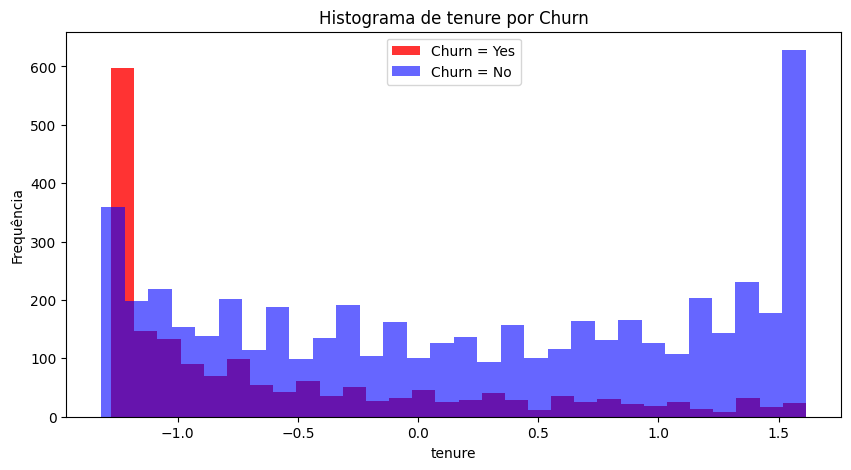

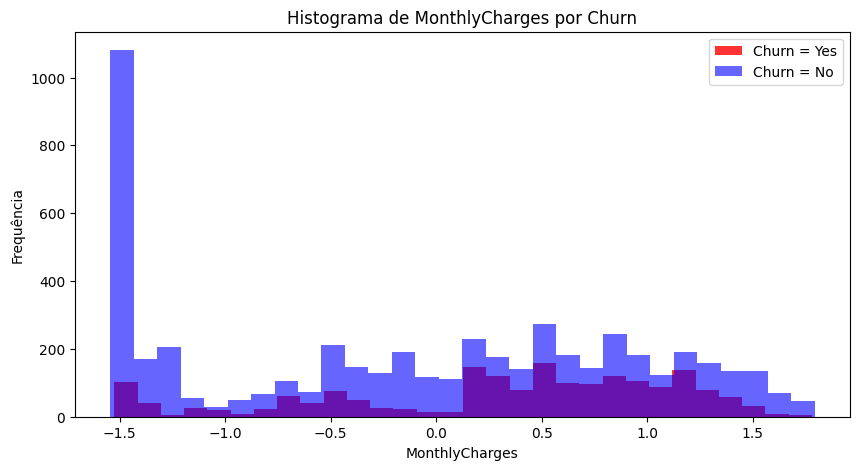

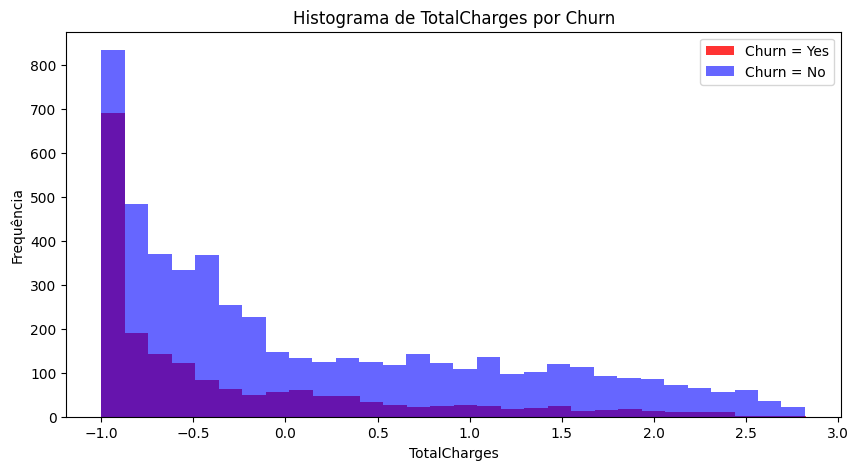

In [11]:
# Análise Exploratória de Dados (AED)

# Analisa a distribuição do cancelamento de clientes (Churn) com cada variável numérica
for coluna in colunas_numericas:
    plt.figure(figsize=(10, 5))
    plt.hist(
        dados[dados_original['Churn'] == 'Yes'][coluna],
        alpha=0.8, label='Churn = Yes', bins=30, color='red'
    )
    plt.hist(
        dados[dados_original['Churn'] == 'No'][coluna],
        alpha=0.6, label='Churn = No', bins=30, color='blue'
    )
    plt.title(f'Histograma de {coluna} por Churn') 
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()


# **Etapa 2: Engenharia de Atributos e Redução de Dimensionalidade**

**1. Criação de Features Derivadas:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Exemplo: tempo de contrato em meses, gastos médios.

**2. Seleção dos Melhores Atributos:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Utilizar `SelectKBest` para identificar as variáveis mais relevantes.

**3. Redução de Dimensionalidade:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Aplicar PCA para visualização em 2D e possível redução do número de variáveis.


In [ ]:
#Criação de Features Derivadas

# Quantidade total de serviços contratados
# Define as colunas que representam os serviços contratados
servicos = [
    'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
    'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
    'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic'
]

# Soma de serviços de todos os serviços contratados
# Cria uma nova coluna 'Qtd_Servicos_Contratados' que soma os serviços contratados da lista 'servicos'
dados['Qtd_Servicos_Contratados'] = dados[servicos].sum(axis=1)

# Estimativa de tempo de contrato

def categoria_tempo(tenure):
    if tenure < -0.5:
        return 'Curto'
    elif tenure < 0.5:
        return 'Médio'
    else:
        return 'Longo'

dados['CategoriaTempoContrato'] = dados['tenure'].apply(categoria_tempo)

tempo_encoded = pd.DataFrame(
    encoder.fit_transform(dados[['CategoriaTempoContrato']]).toarray(),
    columns=encoder.get_feature_names_out(['CategoriaTempoContrato'])
)

dados = pd.concat([dados, tempo_encoded], axis=1)
dados.drop(['CategoriaTempoContrato'], axis=1, inplace=True)

# Estimativa de gasto médio mensal
dados['GastoMedioMensal'] = dados.apply(
    lambda x: 0 if x['tenure'] == 0 else x['TotalCharges'] / x['tenure'], axis=1
)

#dados.to_csv('Mod-Telco-Customer-Churn.csv', index=False)

In [ ]:
#impotação de bibliotecas para seleção e separação de features
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.impute import SimpleImputer

F = dados.drop(['customerID'], axis=1)

# Separando somente as features
F = dados.drop(['customerID','Churn_Yes', 'Churn_No'], axis=1)  # ajuste conforme seu target

# Separando somente o target
t = dados['Churn_Yes']  

# Definindo o valor de k (quantidade de atributos a serem selecionados)
k = 10  

# Criando o seletor
selector = SelectKBest(score_func=f_classif, k=k)

# Ajustando o seletor aos dados
F_new = selector.fit_transform(F, t)

# Visualiaza os scores das features
selected_indices = selector.get_support(indices=True)
selected_features = F.columns[selected_indices]

print("Score das features:")
print(selected_features)

F_best = F[selected_features]



ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '7590-VHVEG'

In [ ]:
# Aplicando PCA para visualização 2D

# Importando a biblioteca PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Criando uma instância do PCA para reduzir a dimensionalidade
# para 2 componentes principais (Features e target)
pca = PCA(n_components=2)

# Ajustando e transformando os dados
F_pca = pca.fit_transform(F_best)

import pandas as pd
# Criando um DataFrame com os componentes principais
pca_df = pd.DataFrame(data=F_pca, columns=['PC1', 'PC2'])

# Adicionando a coluna de target ao DataFrame
pca_df['Churn_Yes'] = t.values

#importando seaborn para visualização
import seaborn as sns

# Visualizando os dados em 2D com seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Churn', palette='Set1')
plt.title('PCA - Visualização 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



# **Etapa 3: Modelos de Classificação**

**1. Divisão dos Dados:**  
Dividir o conjunto em treino e teste (exemplo: 80% treino / 20% teste).

**2. Treinamento de Modelos:**  
Treinar três modelos de classificação:
- **Árvore de Decisão** (`DecisionTreeClassifier`)
- **Máquina de Vetores de Suporte** (`SVC`)
- **Perceptron Multicamadas** (`MLPClassifier`)

**3. Ajuste de Hiperparâmetros:**  
Utilizar `GridSearchCV` para encontrar os melhores hiperparâmetros de cada modelo.

**4. Avaliação de Desempenho:**  
Avaliar os modelos utilizando:
- Matriz de Confusão
- Precision, Recall, F1-Score
- ROC-AUC


# **Etapa 4: Clustering e Segmentação**

**1. Aplicar KMeans:**  
Segmentar a base completa (sem a variável de churn).

**2. (Opcional) Testar DBSCAN:**  
Explorar clusters de formas arbitrárias.

**3. Analisar cada cluster quanto a:**  
- **Taxa média de churn**
- **Receita média mensal**
- **Uso de serviços extras:** DSL, telefonia, streaming

**4. Visualizar clusters em 2D:**  
Utilizar PCA ou t-SNE para projeção e visualização.